In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('hls', 10, desat = 0.8)
#colors = colors[::-1]
colors.pop(2)

sns.set_palette(colors)

#sns.palplot(colors)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [21]:
def slope_fork(x_j):
    if x_j >= 0.5:
        return 1
    else:
        return -0.59
    
def update_x(x_j, eps, N_tot):
    x_up = x_j + slope_fork(x_j) * eps / N_tot
    if x_up < 1:
        return x_up
    else:
        return 1
    



def sim(x, w, dt, tmax, sig=0.1, eps=0.1):
    N = len(w)
    t_save = [[] for i in range(N)]
    t = 0

    while t < tmax:
        for i in range(len(x)):
            x[i] = x[i] + w[i]*dt

            # Check for clapping in x_i
            if x[i] >= 1:
                # Reset x_i
                x[i] = 0
                #Updating w_i and t_(clap,i)
                w[i] = np.random.normal(0, sig) + 1 / (t - t_clap[i])
                t_clap[i] = t
                t_save[i].append(t)

                # Update all other x
                for j in range(len(x_list)):
                    if j != i:
                        x[j] = update_x(x[j], eps, N)

                        # Check for clapping in x_j
                        if x[j] >= 1:
                            x[j] = 0

                            # Updating w_j and t_(clap,j)
                            w[j] = np.random.normal(0, sig) + 1 / (t - t_clap[j])
                            t_clap[j] = t
                            t_save[j].append(t)
        
        t += dt        
    return t_save

100


Text(0, 0.5, 'Frequency')

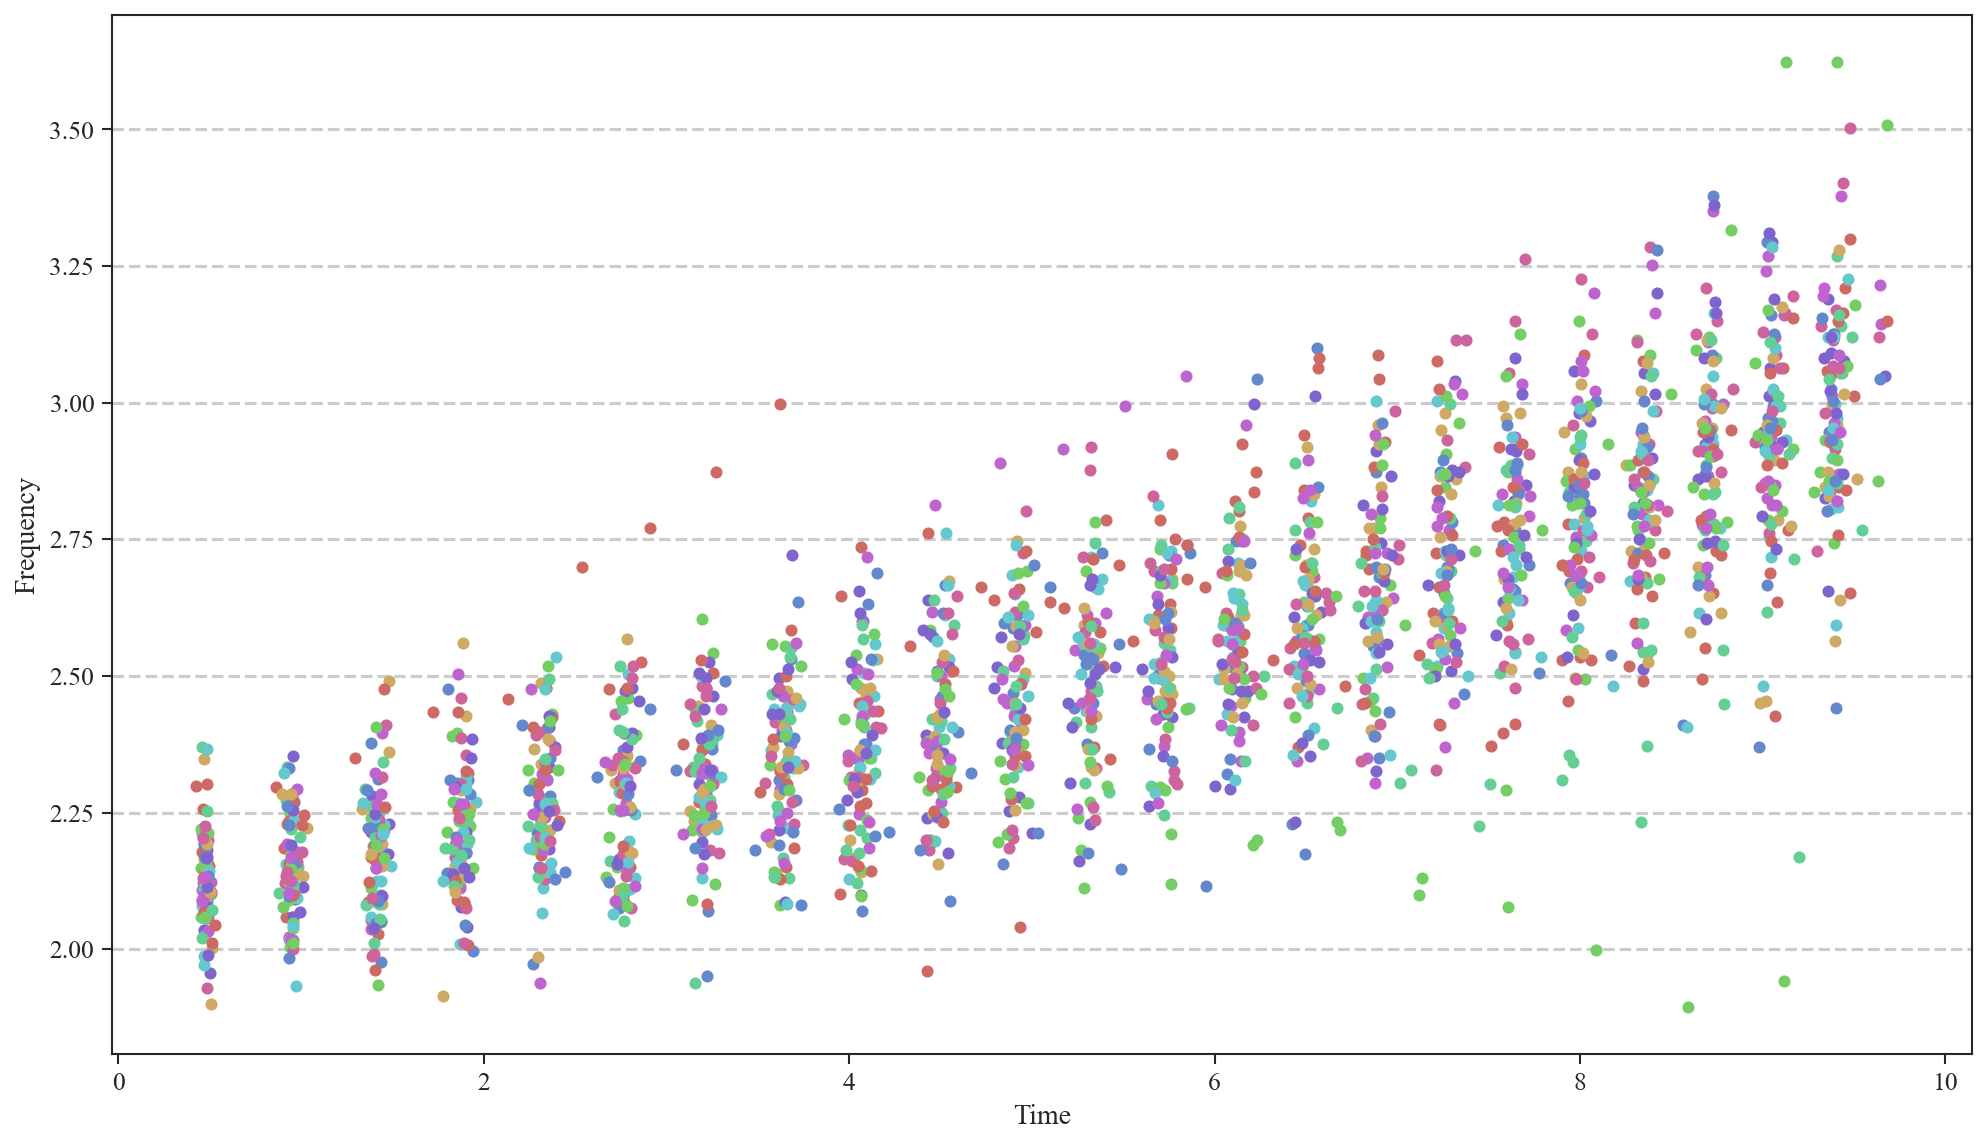

In [47]:
N = 100
w_init = np.random.normal(2, 0.1,N)
x_list = np.zeros(N)
t_clap = np.zeros(N)

dt = 0.0005
t_max = 10

t_save = sim(x_list, w_init, dt, t_max)

print(len(t_save))

for i, freq in enumerate(t_save):
    y = 1 / np.diff(freq)
    x = freq[:-1]
    plt.plot(x, y, 'o', label=fr'$\omega_{i}$')

plt.xlabel('Time')
plt.ylabel('Frequency')
#plt.legend()



In [51]:
def clap(x, w, t, t_clap, sig):
    x = 0
    w = np.random.normal(0, sig) + 1 / (t - t_clap)
    t_clap = t
    return x, w, t_clap

def sim2(x, w, dt, tmax, sig=0.1, eps=0.1):
    N = len(w)
    w_save = [[] for i in range(N)]
    t = 0

    while t < tmax:
        for i in range(len(x)):
            x[i] = x[i] + w[i]*dt

            # Check for clapping in x_i
            if x[i] >= 1:
                x[i], w[i], t_clap[i] = clap(x[i], w[i], t, t_clap[i], sig)
                w_save[i].append(w[i])
                
                # Update all other x
                for j in range(len(x_list)):
                    if j != i:
                        x[j] = update_x(x[j], eps, N)

                        # Check for clapping in x_j
                        if x[j] >= 1:
                            x[j], w[j], t_clap[j] = clap(x[j], w[j], t, t_clap[j], sig)
                            w_save[j].append(w[j])

        t += dt        
    return w_save

100
(array([], dtype=int64),)


C:\Users\Niels\AppData\Local\Temp\ipykernel_17400\570510708.py:13: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  print(np.where(len(w_save) == 0))


Text(0, 0.5, 'Frequency')

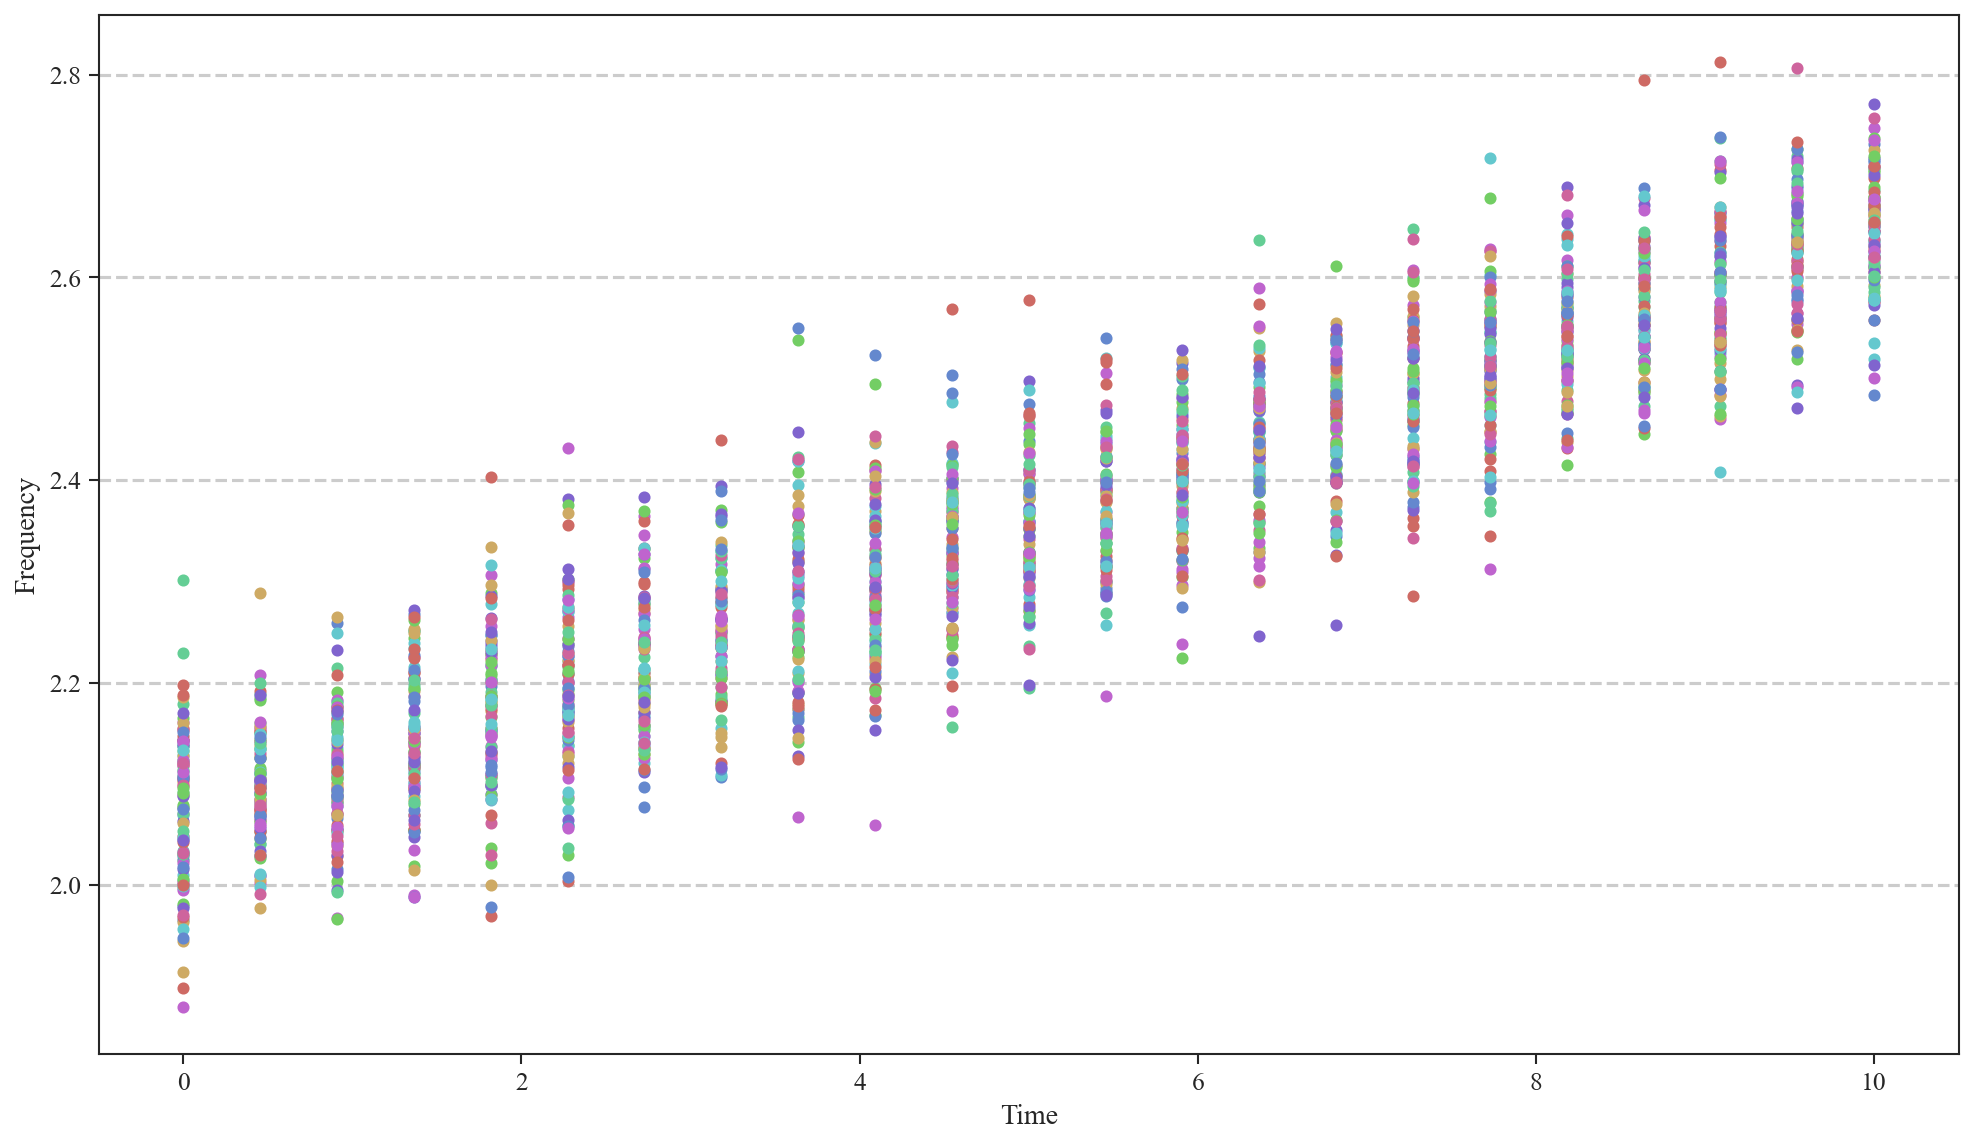

In [62]:
N = 100
w_init = np.random.normal(2, 0.1,N)
x_list = np.zeros(N)
t_clap = np.zeros(N)

dt = 0.0005
t_max = 10

w_save = sim2(x_list, w_init, dt, t_max, sig=0.05)

print(len(t_save))

print(np.where(len(w_save) == 0))

for w in w_save:
    y = w
    x = np.linspace (0, t_max, len(w))
    plt.plot(x, y, 'o', label=fr'$\omega_{i}$')

plt.xlabel('Time')
plt.ylabel('Frequency')
#plt.legend()